Akram Uddin

---


CSc 44700

---


Professor Zhongmin Wu

---

Midterm Project



In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [ ]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

100%|██████████| 172k/172k [00:00<00:00, 61.1MB/s]

Extracting files...


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We know that customeID is useless as a feature so we will get rid of it.

In [ ]:
df = df.drop('customerID', axis=1)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Inspecting our data
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


(7043, 20)

Weirdly the TotalCharges column consists of object dtypes when it should be numeric so we will change that

# Data Preprocessing Part 1

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Since we only have 11 missing values, which accounts for less than a percent of the data, instead of removing it, we can replace it with the mean so we lose as little info as possible.

In [ ]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

<ipython-input-9-bc6324e1db93>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)


In [ ]:
#We do this again to make sure the missing values have been replaced
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#Observing statistics for numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


# Exploratory Data Analysis/Visulaizations

<Axes: >

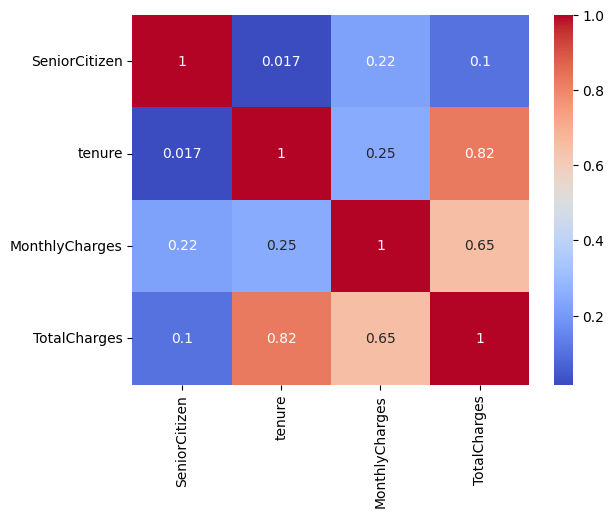

In [ ]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')


There seems to be a strong correlation between tenure and TotalCharges. This makes sense as tenure measures how long a customer has stayed with the company (in months) and so the longer they stay the more they would be paying overall.

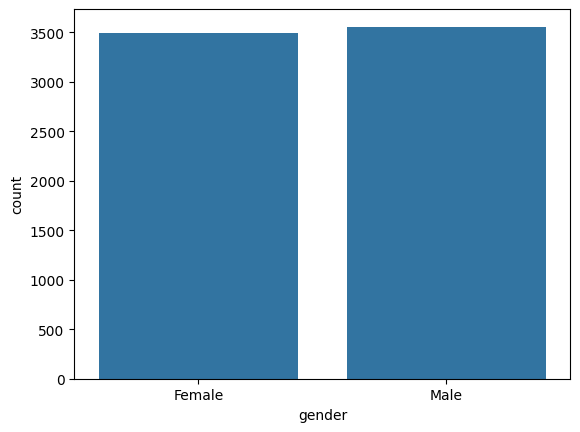

gender
Male      3555
Female    3488
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=df)
plt.show()

print(df['gender'].value_counts())

#Our gender distribution is nearly uniform

Text(0.5, 1.0, '% of Senior Citizens')

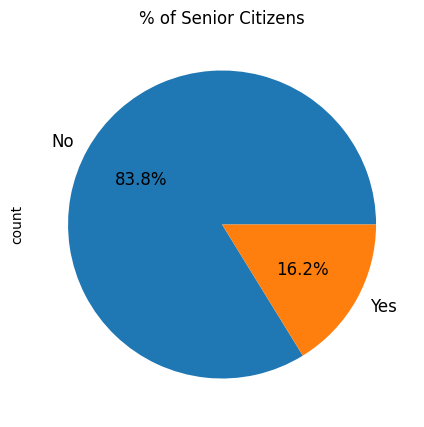

In [ ]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.set_title('% of Senior Citizens', fontsize = 12)

We see that the majority of customers are not senior citizens.

In [ ]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
#Converting from categorical to numerical/binary will make it easier to visualize

<ipython-input-15-449862e0bf95>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
<ipython-input-15-449862e0bf95>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

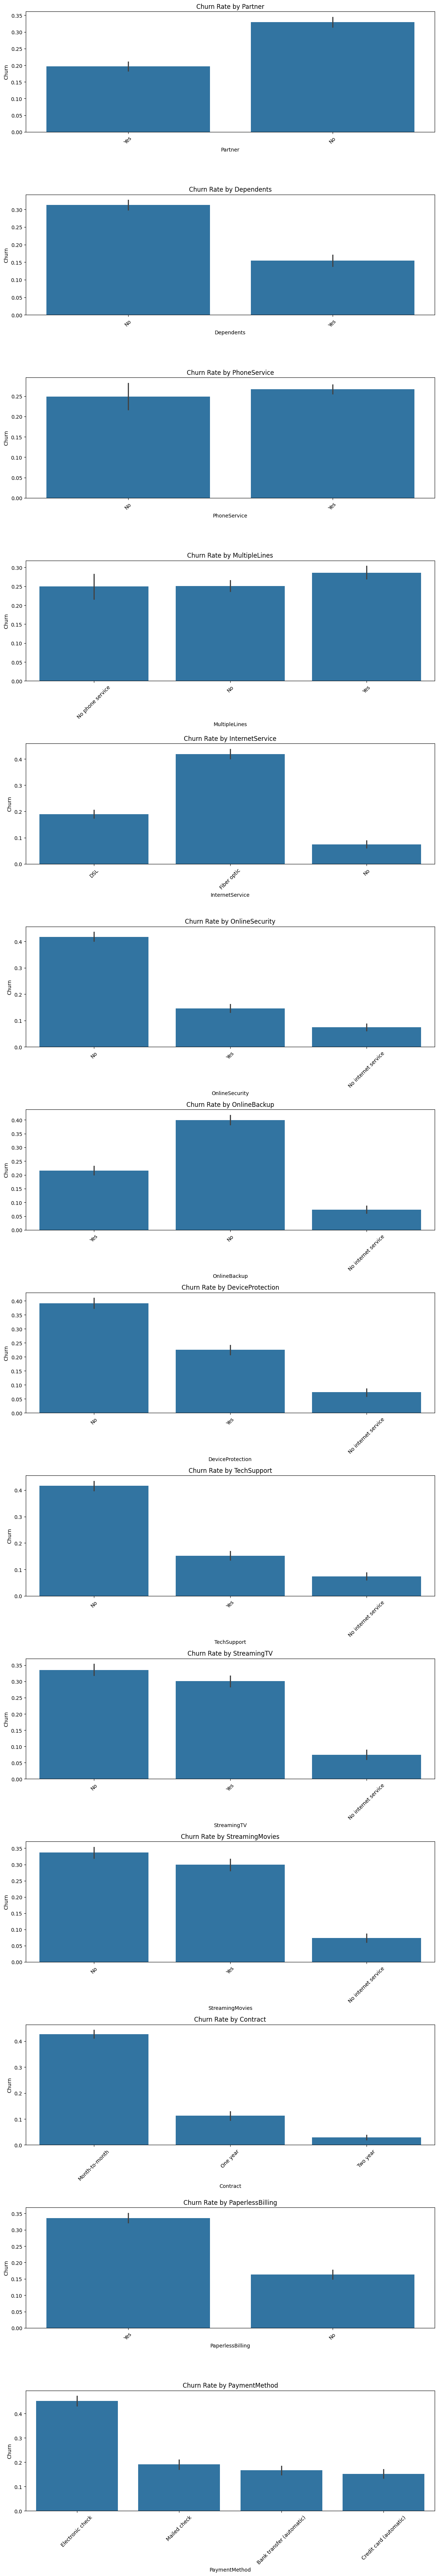

In [ ]:
features = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(12, 5 * len(features)))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.barplot(x=feature, y='Churn', data=df, estimator=lambda x: sum(x)/len(x))  # Mean Churn rate per category
    plt.title(f'Churn Rate by {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The bar charts represent the possible values of a given feature and the average churn rate for that feature.

Of course we shouldn't take these graphs at face value as we know correlation isn't causation, instead as we keep learning more about the data we can then infer what the results of the graphs could mean.

# **Research Questions/Hypotheses**

1. What demographics are most closely related with a higher churning rate?

  The goal for this question is to identify what demographics Tesco should focus on advertising to in order to gain customers that they know are less likely to churn.

  Expectedly I believe gender won't play much of a role but age, partner status, and number of dependents will.

2. Which features overall are the most important for deciding if a customer will churn or not?

  The goal is to decide which features are not as important as other in our data so we can ignore them and focus on the more important ones. These more important features could tell us what we need to improve on.

  I think that contract-type, internet-service provider, and tenure will be the most important features to tell if a customer will churn or not


I will train machine learning models on the dataset to evaluate the impact of different demographic features on churn.

I will also use feature selection techniques such as Sequential Forward/Backward to determine which features overall are the most important for deciding whether or not a customer will churn.

# Data Preprocessing Part 2

In [ ]:
from sklearn.model_selection import train_test_split

categorical_columns = df.select_dtypes(include=["object", "category"]).columns.tolist()
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Its clear from our df.describe() that our categories can vary in the range of their values a lot, so it is best to scale them.

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

We will now use OneHot encoding to convert all categorical variables to numerical because the machine learning models I will use only work with numerical inputs.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

encoded_columns = encoder.get_feature_names_out(categorical_columns)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

X_train = X_train.drop(columns=categorical_columns).join(X_train_encoded)
X_test = X_test.drop(columns=categorical_columns).join(X_test_encoded)

We will create and train models without using feature selection, and then train models with feature selection to see the difference.

For our 3 weak classifiers we will use KNN, SVM, and Decision Trees.

#  Model Training, Evaluation, and Hyperparameter Tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC

dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC()

Then we will use GridSearchCV in order to obtain the best hyperparamters for each model and use those to fit and model our training set.

In [ ]:
from sklearn.model_selection import GridSearchCV
#The param_grid for each respective model
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2,4,6,8,10]}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]}

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}


In [ ]:
grid_search_dt = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, refit=True)
grid_search_knn = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5,refit=True)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=5,refit=True)

In [ ]:
grid_search_dt.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
dt_pred = grid_search_dt.predict(X_test)
knn_pred = grid_search_knn.predict(X_test)
svm_pred = grid_search_svm.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix for Decision Tree: ",confusion_matrix(y_test, dt_pred))
print("Confusion Matrix for KNN: ",confusion_matrix(y_test, knn_pred))
print("Confusion Matrix for SVM: ",confusion_matrix(y_test, svm_pred))

Confusion Matrix for Decision Tree:  [[975  61]
 [227 146]]
Confusion Matrix for KNN:  [[909 127]
 [158 215]]
Confusion Matrix for SVM:  [[959  77]
 [191 182]]


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score Decision Tree: ",accuracy_score(y_test, dt_pred))
print("Accuracy Score KNN: ",accuracy_score(y_test, knn_pred))
print("Accuracy Score SVM: ",accuracy_score(y_test, svm_pred))

Accuracy Score Decision Tree:  0.7955997161107168
Accuracy Score KNN:  0.7977288857345636
Accuracy Score SVM:  0.8097941802696949


Our model accuracy is not that bad, but it could definitely be a lot better. We'll see if an ensemble method gives us a better accuracy.

In [ ]:
print(grid_search_dt.best_params_)
print(grid_search_knn.best_params_)
print(grid_search_svm.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
{'C': 1, 'kernel': 'poly'}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#We'll use an AdaBoostClassifier for our ensemble method
#And we can use the best parameters we found for the decision tree as the parameters for our base estimator
base_adaboost_estimator = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=2)
estimator_adaboost = AdaBoostClassifier(estimator=base_adaboost_estimator, n_estimators=100)
estimator_adaboost.fit(X_train, y_train)
pred_adaboost = estimator_adaboost.predict(X_test)
print("Confusion Matrix for Adaboost: ",confusion_matrix(y_test, pred_adaboost))
print("Accuracy Score Adaboost: ",accuracy_score(y_test, pred_adaboost))

Confusion Matrix for Adaboost:  [[925 111]
 [161 212]]
Accuracy Score Adaboost:  0.8069552874378992


# Feature Selection/Dimensionality Reduction

While our AdaBoostClassifier achieved a slightly better accuracy compared to KNN and DecisionTree by themselves, it actually did a little worse compared to SVM. Let's see if feature selection techniques can improve the accuracy of these models.

I will use SequentialFeatureSelector, a built in scikit learn feature-selection method.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
#We'll use the best parameters we found previously using grid search.
dt_seq = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=2)
knn_seq = KNeighborsClassifier(algorithm='auto',n_neighbors=11,p=1,weights='uniform')
svm_seq = SVC(C=1,kernel='poly')

In [ ]:
selector_dt = SequentialFeatureSelector(estimator=dt_seq, n_features_to_select=3,cv=5)
selector_knn = SequentialFeatureSelector(estimator=knn_seq, n_features_to_select=3,cv=5)
selector_svm = SequentialFeatureSelector(estimator=svm_seq, n_features_to_select=3,cv=5)

In [ ]:
#Now we'll fit these new selectors

selector_dt = selector_dt.fit(X_train, y_train)
selector_knn = selector_knn.fit(X_train, y_train)
selector_svm = selector_svm.fit(X_train, y_train)


In [ ]:
print(selector_dt.get_support())
print(selector_knn.get_support())
print(selector_svm.get_support())
print(selector_dt.feature_names_in_)

[ True  True False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False]
[False False False  True False False False False False False  True False
 False False False False False False False False False False False False
  True False False False False False]
[ True  True False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False]
['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges' 'gender_Male'
 'Partner_Yes' 'Dependents_Yes' 'PhoneService_Yes'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No internet service' 'OnlineSecurity_Yes'
 'OnlineBackup_No internet service' 'OnlineBackup_Yes'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No internet service' 'TechSu

selector_knn tells chose the 3 features TotalCharges, InternetService_Fiber optic, and Contract_One year. While our other 2 selectors both picked SeniorCitizen, tenure, and InternetService_Fiber optic

Now lets try this with AdaBoost

In [ ]:
adaboost_seq = AdaBoostClassifier(estimator=base_adaboost_estimator, n_estimators=100)
selector_adaboost = SequentialFeatureSelector(estimator=adaboost_seq, n_features_to_select=3,cv=5)
selector_adaboost = selector_adaboost.fit(X_train, y_train)

In [ ]:
print(selector_adaboost.get_support())
print(selector_adaboost.feature_names_in_)

[False  True False False False False False False False False  True False
 False False False False False False False False False False False False
 False False  True False False False]
['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges' 'gender_Male'
 'Partner_Yes' 'Dependents_Yes' 'PhoneService_Yes'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No internet service' 'OnlineSecurity_Yes'
 'OnlineBackup_No internet service' 'OnlineBackup_Yes'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No internet service' 'StreamingMovies_Yes'
 'Contract_One year' 'Contract_Two year' 'PaperlessBilling_Yes'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


The features kept here are tenure, InternetService_Fiber optic, and 'PaperlessBilling_Yes'

Among all 4 models the one feature that has stayed relevant is InternetService_Fiber optic. For the other two most relevant features,tenure has stayed for 3 models, while SeniorCitizen remained relevant in 2.

In [ ]:
#Now that we have figured out our 3 most relevant features, let's try
#to fit our models again using only those 3.

X_train_new = X_train[['tenure', 'SeniorCitizen', 'InternetService_Fiber optic']]

#These models are the models with the best paramters we've found previously.
dt_seq.fit(X_train_new, y_train)
knn_seq.fit(X_train_new, y_train)
svm_seq.fit(X_train_new, y_train)


SVC(C=1, kernel='poly')

In [ ]:
new_dt_pred = dt_seq.predict(X_test[['tenure', 'SeniorCitizen', 'InternetService_Fiber optic']])
new_knn_pred = knn_seq.predict(X_test[['tenure', 'SeniorCitizen', 'InternetService_Fiber optic']])
new_svm_pred = svm_seq.predict(X_test[['tenure', 'SeniorCitizen', 'InternetService_Fiber optic']])

In [ ]:
print("Confusion Matrix for Decision Tree with Feature Selection:", confusion_matrix(y_test, new_dt_pred))
print("Confusion Matrix for KNN with Feature Selection: ",confusion_matrix(y_test, new_knn_pred))
print("Confusion Matrix for SVM with Feature Selection: ",confusion_matrix(y_test, new_svm_pred))

Confusion Matrix for Decision Tree with Feature Selection: [[972  64]
 [219 154]]
Confusion Matrix for KNN with Feature Selection:  [[909 127]
 [164 209]]
Confusion Matrix for SVM with Feature Selection:  [[964  72]
 [207 166]]


In [ ]:
print("Accuracy Score Decision Tree with Feature Selection: ",accuracy_score(y_test, new_dt_pred))
print("Accuracy Score KNN with Feature Selection: ",accuracy_score(y_test, new_knn_pred))
print("Accuracy Score SVM with Feature Selection: ",accuracy_score(y_test, new_svm_pred))

Accuracy Score Decision Tree with Feature Selection:  0.7991483321504613
Accuracy Score KNN with Feature Selection:  0.7934705464868701
Accuracy Score SVM with Feature Selection:  0.8019872249822569


In [ ]:
estimator_adaboost.fit(X_train_new, y_train)
pred_adaboost_new = estimator_adaboost.predict(X_test[['tenure', 'SeniorCitizen', 'InternetService_Fiber optic']])

In [ ]:
print("Confusion Matrix for Adaboost with Feature Selection: ",confusion_matrix(y_test, pred_adaboost_new))
print("Accuracy Score Adaboost with Feature Selection: ",accuracy_score(y_test, pred_adaboost_new))

Confusion Matrix for Adaboost with Feature Selection:  [[957  79]
 [204 169]]
Accuracy Score Adaboost with Feature Selection:  0.7991483321504613


It seems reducing the number of features has actually caused most of our models to be less accurate.

# Model Interpretation and Summary

Though all 4 models were similar in performance, our best performing model was our svm model that did not undergo feature selection, so let's take a closer look at that.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.49      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



This classification report tells us that our model was very accurate in predicting non-churners correctly as it has a f1-score of 0.88. But struggled quite a bit in correctly predicting churners shown by the f1-score of 0.58

Since the number of non-churners heavily outweighs the number of churners, these results could be explained by a class imbalance.

We could possibly improve the performance of our model in the feature by undersampling non-churner samples/instances, or we could tune the hyperparameters of our model and modify the class weights to be balanced.

**Research Question 1:**

My first research question was seeing if there were any demographics that disproportionately were churning or not.

Let's take a look at the demographics of Senior Citizens vs Non Senior Citizens the difference in churning between them.

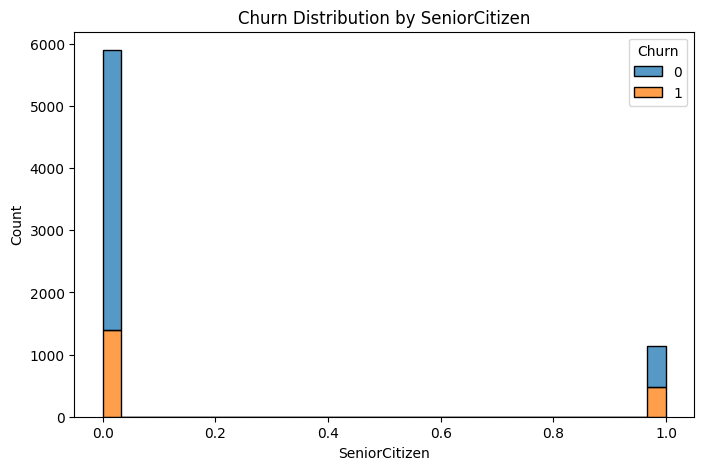

Churn             0     1
SeniorCitizen            
0              4508  1393
1               666   476


In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="SeniorCitizen", hue="Churn", multiple="stack", bins=30)
plt.xlabel("SeniorCitizen")
plt.ylabel("Count")
plt.title("Churn Distribution by SeniorCitizen")
plt.show()
churn_counts = pd.crosstab(df['SeniorCitizen'], df['Churn'])
print(churn_counts)

Around 23% of non senior-citizens churn while over 40% of senior citizens churn.

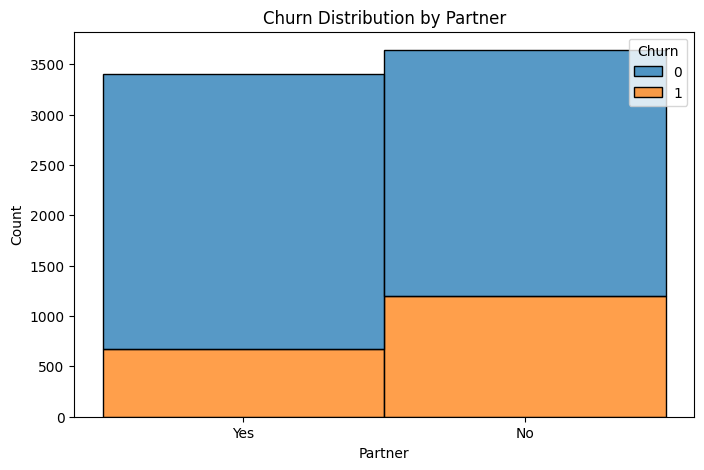

Churn       0     1
Partner            
No       2441  1200
Yes      2733   669


In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Partner", hue="Churn", multiple="stack", bins=30)
plt.xlabel("Partner")
plt.ylabel("Count")
plt.title("Churn Distribution by Partner")
plt.show()
churn_counts = pd.crosstab(df['Partner'], df['Churn'])
print(churn_counts)

33% of those with no partner churn.

While only 20% of those with a partner churn


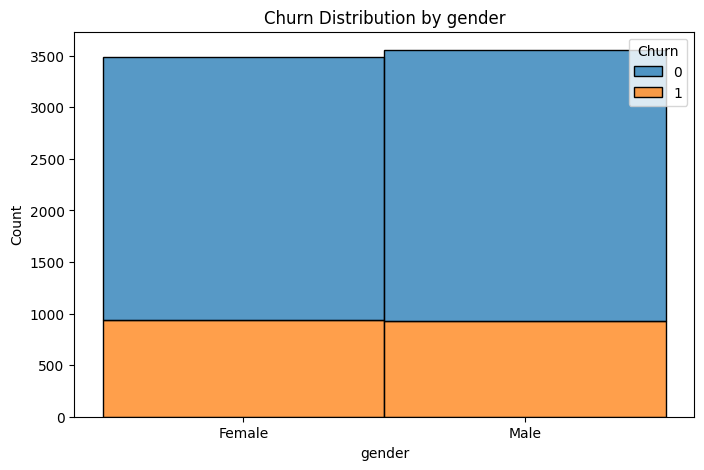

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="gender", hue="Churn", multiple="stack", bins=30)
plt.xlabel("gender")
plt.ylabel("Count")
plt.title("Churn Distribution by gender")
plt.show()

We see insignificant difference when it comes to the churning rate between genders.

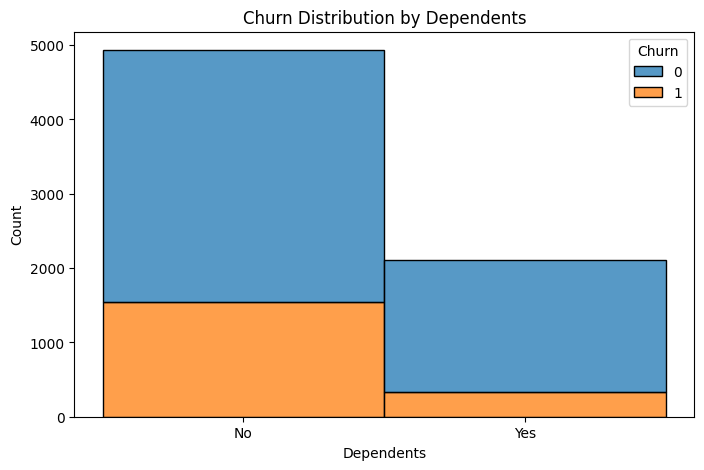

Churn          0     1
Dependents            
No          3390  1543
Yes         1784   326


In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Dependents", hue="Churn", multiple="stack", bins=30)
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.title("Churn Distribution by Dependents")
plt.show()
churn_counts = pd.crosstab(df['Dependents'], df['Churn'])
print(churn_counts)

31% of those with no dependents choose to churn
While only 15% of those with dependents choose to churn

**Observations:**

Through these charts we have seen that those with no partners and no dependents are much more likely to churn than their respective counterparts. This could mean the services of Telco most benefit families over individuals.

Perhaps a plan of action the company can take is to revise old plans/packages and/or offer new plans that offer more benefits to single-person households

This could also explain why senior citizens are more likely to churn, as most of them probably don't have dependents as they are retired so there is likely overlap between the two demographics.

This also means marketing resources are probably best spent on advertising to younger adults, as they are less likely to have dependents or a serious partner.

**Research Question 2:**

When performing feature selection we saw that the 3 most important/relevant features were tenure,SeniorCitizen,and InternetService_Fiber optic.

My hypotheses was almost fully correct as I had predicted that most important features to be InternetService provide, tenure, and Contract type.

We have already discussed how being a senior citizen affects churn rate, but what about the other two?

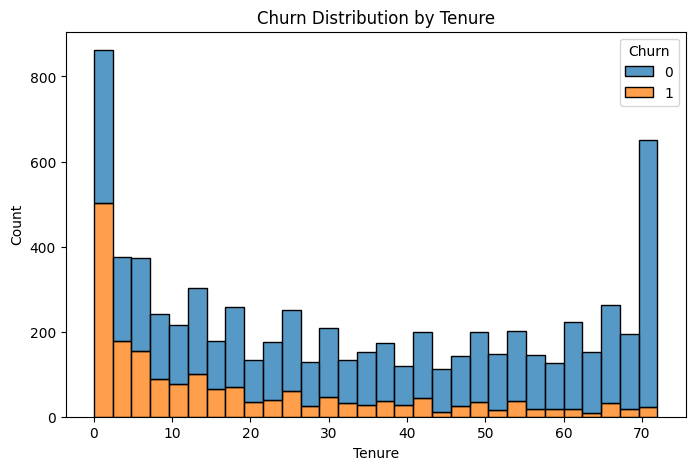

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30)
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Churn Distribution by Tenure")
plt.show()


Clearly we see a pattern that is as tenure increases, people are less and less likely to churn

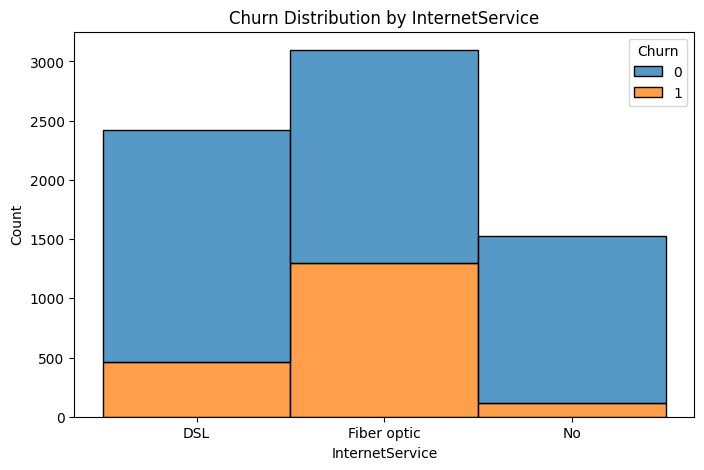

Churn               0     1
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="InternetService", hue="Churn", multiple="stack", bins=30)
plt.xlabel("InternetService")
plt.ylabel("Count")
plt.title("Churn Distribution by InternetService")
plt.show()
churn_counts = pd.crosstab(df['InternetService'], df['Churn'])
print(churn_counts)


19% of those who have DSL churned

42% of those have Fiber Optic churned

7% of those with no internet service provider churned

Clearly those with Fiber Optic are much more likely to churn

**Observations:**

We see that as a customer stays longer and longer with the company, they become much less likely to churn, this means we have good customer retention

As most of the people who churn are the ones who only stay for a few months, a plan of action could be to create plans that offer great benefits for signing up. These benefits can also come in the form of getting rewards for the first few months of staying with the company.

This incentives people who have just signed up to stay a little longer in order to reap all the rewards of the contract or plan they agreed to. And as they stay longer, we know the company has good customer retention so this could convince them to start rethinking their decision of leaving if they had any thoughts about it.

As long as we get customers to stay with the company for the first few months, they are much less likely to churn overall.

As for the internet service provider its clear that there is a problem with the company's fiber optic service

To me, it simply means that the company needs to try and survey the people who have fiber optic to figure out the issues of the service and then invest their time and resources into improving it significantly or perhaps maybe lower the price. Since clearly a large portion who choose fiber optic are not satisified with it.